In [290]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import numpy as np
import pandas as pd
from torchvision.io import read_image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader



In [752]:
data_file = "glyphs_40_thresh_crop.csv" # you can grab this from https://github.com/dash8x/Thaana-Dataset
r_dataset = []


with open(data_file) as f:
    r_dataset = [line.rstrip() for line in f]

In [753]:
r_dataset[0]

'1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,0,113,255,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,110,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,236,255,251,0,83,255,255,32,255,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,255,255,0,0,10,32,31,0,255,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,112,0,0,0,0,0,223,255,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,171,255,255,0,0,0,0,0,0,223,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,155,0,0,0,0,0,112,255,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Process the CSV data


In [754]:
p_dataset = []
# this will have in the format as [[imdata][index]]

for sample in r_dataset:
    c_split = sample.split(",") 

    img_data = list(map(int, c_split[1:1601]))
    
    if c_split[1601] != "null":
        cons_index = int(c_split[1601])
    else:
        print("bruh")
    
    if c_split[1602] != "null":
        vowel_index = int(c_split[1602])
    else:
        vowel_index = 12

    
    c_data = [np.asarray(img_data),[cons_index,vowel_index]]


    p_dataset.append(c_data)

In [755]:
len(p_dataset)

25133

In [757]:
p_dataset[0]

[array([0, 0, 0, ..., 0, 0, 0]), [0, 10]]

## Create the custom dataset from processed CSV data


In [761]:
class ThaanaDataset(Dataset):
    def __init__(self, dataset_list,transform=ToTensor(), target_transform=None):
        self.img_labels = dataset_list        
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.img_labels[idx][0]
        label = self.img_labels[idx][1][0]

        #if self.transform:
        image = torch.tensor(image/255)
        image = torch.tensor(image, dtype=torch.float32)
        if self.target_transform:
            label = self.target_transform(label)
        

        return image, label

training_data = ThaanaDataset(
    p_dataset[0:22000],
    transform=None,
    target_transform=Lambda(lambda y: torch.zeros(38, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

test_data = ThaanaDataset(
    p_dataset[22000:25133],
    transform=None,
    target_transform=Lambda(lambda y: torch.zeros(38, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True) # we also create a test dataset


In [765]:
40*40

1600

In [766]:
training_data[0]

/var/folders/6k/cj4x66t11jz0w_nbm5psk5dh0000gn/T/ipykernel_83162/979268892.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, dtype=torch.float32)


(tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]))

## See single example

tensor([0., 0., 0.,  ..., 0., 0., 0.])
Feature batch shape: torch.Size([64, 1600])
Labels batch shape: torch.Size([64, 38])


/var/folders/6k/cj4x66t11jz0w_nbm5psk5dh0000gn/T/ipykernel_83162/979268892.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, dtype=torch.float32)


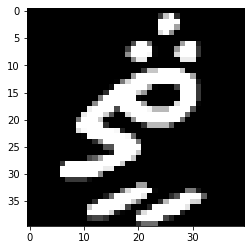

Label: tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])


In [767]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))

print(train_features[0])

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].reshape(40,40)
label = train_labels[1]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Visualize the dataset 

/var/folders/6k/cj4x66t11jz0w_nbm5psk5dh0000gn/T/ipykernel_83162/979268892.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, dtype=torch.float32)


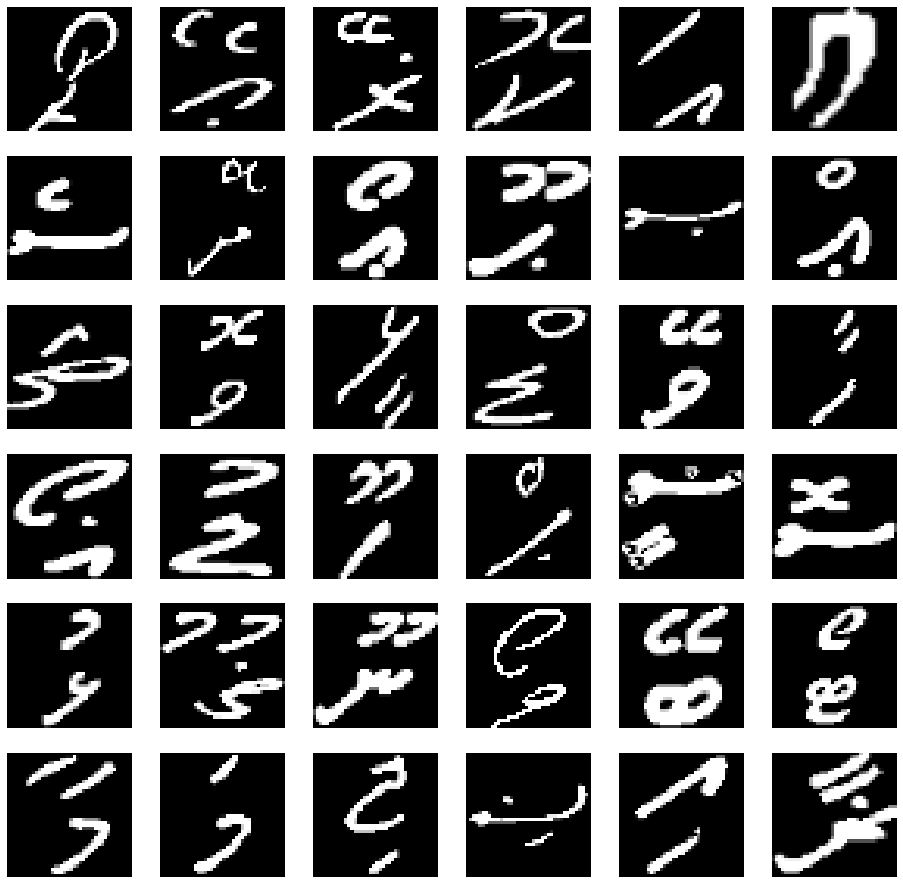

In [769]:
labels_map = {0:'ހ',1:'ށ',2:'ނ',3:'ރ',4:'ބ',5:'ޅ',6:'ކ',7:'އ',8:'ވ',9:'މ',10:'ފ',11:'ދ',12:'ތ',13:'ލ',14:'ގ',15:'ޏ',16:'ސ',17:'ޑ',18:'ޒ',19:'ޓ',20:'ޔ',21:'ޕ',22:'ޖ',23:'ޗ',24:'ޘ',25:'ޙ',26:'ޚ',27:'ޛ',28:'ޜ',29:'ޝ',30:'ޞ',31:'ޟ',32:'ޠ',33:'ޡ',34:'ޢ',35:'ޣ',36:'ޤ',37:'ޥ',}


figure = plt.figure(figsize=(16, 16))
cols, rows = 6, 6
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    #plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.reshape(40,40), cmap="gray")
plt.show()

In [770]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## Create the (very simple) model

In [504]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(40*40, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 38),
        )
        

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork()

## See how the training data looks like

In [771]:
training_data[0]


/var/folders/6k/cj4x66t11jz0w_nbm5psk5dh0000gn/T/ipykernel_83162/979268892.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, dtype=torch.float32)


(tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]))

In [814]:
X = torch.rand(1, 40, 40, device=device)
print(X)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[[0.0548, 0.0502, 0.6776,  ..., 0.7485, 0.4476, 0.4584],
         [0.5544, 0.7321, 0.0882,  ..., 0.4808, 0.1666, 0.8863],
         [0.1656, 0.8267, 0.9914,  ..., 0.8466, 0.8010, 0.7218],
         ...,
         [0.9004, 0.8793, 0.6788,  ..., 0.0394, 0.9043, 0.4397],
         [0.5480, 0.1986, 0.3332,  ..., 0.1044, 0.8266, 0.4767],
         [0.2291, 0.6820, 0.3349,  ..., 0.0204, 0.7070, 0.8770]]])
Predicted class: tensor([19])


In [815]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #debug 
        #print(X)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

## Now train the model

In [816]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 8
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    #test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 3.019867  [    0/22000]


/var/folders/6k/cj4x66t11jz0w_nbm5psk5dh0000gn/T/ipykernel_83162/979268892.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, dtype=torch.float32)


loss: 2.993114  [ 6400/22000]
loss: 2.954946  [12800/22000]
loss: 2.971552  [19200/22000]
Epoch 2
-------------------------------
loss: 2.894022  [    0/22000]
loss: 2.975131  [ 6400/22000]
loss: 2.899780  [12800/22000]
loss: 2.889103  [19200/22000]
Epoch 3
-------------------------------
loss: 2.877386  [    0/22000]


KeyboardInterrupt: 

## Test the model with some test data

/var/folders/6k/cj4x66t11jz0w_nbm5psk5dh0000gn/T/ipykernel_83162/979268892.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, dtype=torch.float32)


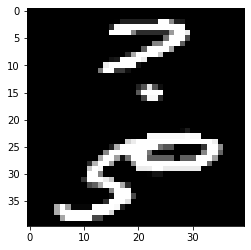

In [823]:
rand_idx  = torch.randint(len(test_data), size=(1,)).item()
t_data = test_data[rand_idx][0]
g_truth = test_data[rand_idx][1].argmax().item()
t_data_unsqueeze = torch.unsqueeze(t_data,0)

img = t_data.reshape(40,40)
label = train_labels[1]
plt.imshow(img, cmap="gray")
plt.show()

In [824]:

with torch.no_grad():
    pred = model(t_data_unsqueeze)
    pred_char = pred.argmax(1)[0].item()



dv_char_pred = labels_map[pred_char]
dv_char_truth = labels_map[g_truth]
print(f"predicted: {dv_char_pred} truth: {dv_char_truth}")

predicted: ތ truth: ޡ
